In [347]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Used a function to get the adult dataframe
def get_df():
    headers=["age","workclass","fnlwgt","education", "education-num", "marital-status", "occupation","relationship",
         "race", "sex", "capital-gain", "captial-loss","hours-per-week","native-country","income"]

    adult_df = pd.read_csv("adult.data", encoding_errors='ignore', delimiter = ' ', on_bad_lines='skip', names= headers )

    return adult_df

adult_df = get_df()

In [348]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
1,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
2,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
3,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
4,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,"27,","Private,","257302,","Assoc-acdm,","12,","Married-civ-spouse,","Tech-support,","Wife,","White,","Female,","0,","0,","38,","United-States,",<=50K
32557,"40,","Private,","154374,","HS-grad,","9,","Married-civ-spouse,","Machine-op-inspct,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K
32558,"58,","Private,","151910,","HS-grad,","9,","Widowed,","Adm-clerical,","Unmarried,","White,","Female,","0,","0,","40,","United-States,",<=50K
32559,"22,","Private,","201490,","HS-grad,","9,","Never-married,","Adm-clerical,","Own-child,","White,","Male,","0,","0,","20,","United-States,",<=50K


In [349]:
# Used A function to clean the adult dataframe 
def cleaning_data(adult_df):
    adult_df['sex'] = np.where(adult_df['sex'] == 'Male,', 1, 0)
    adult_df['income'] = np.where(adult_df['income'] == '<=50K', 1, 0)
    race_map = {'White,':1,'Black,':2,'Asian-Pac-Islander,':3,'Amer-Indian-Eskimo,':4,'Other,':5}
    adult_df['race'] = adult_df['race'].map(race_map)
    adult_df.drop(['education-num','occupation','capital-gain','captial-loss','fnlwgt'], axis = 'columns', inplace=True)
    class_labels = LabelEncoder()
    adult_df['hours-per-week'] = class_labels.fit_transform(adult_df['hours-per-week'].values)
    adult_df['age'] = class_labels.fit_transform(adult_df['age'].values)
    adult_df['workclass'] = class_labels.fit_transform(adult_df['workclass'].values)
    adult_df['education'] = class_labels.fit_transform(adult_df['education'].values)
    adult_df['marital-status'] = class_labels.fit_transform(adult_df['marital-status'].values)
    adult_df['relationship'] = class_labels.fit_transform(adult_df['relationship'].values)
    adult_df['race'] = class_labels.fit_transform(adult_df['race'].values)
    adult_df['native-country'] = class_labels.fit_transform(adult_df['native-country'].values)
    return adult_df

In [350]:
cleaning_data(adult_df)

,age,workclass,education,marital-status,relationship,race,sex,hours-per-week,native-country,income
0,22,7,9,4,1,0,1,34,39,1
1,33,6,9,2,0,0,1,4,39,1
2,21,4,11,0,1,0,1,34,39,1
3,36,4,1,2,0,1,1,34,39,1
4,11,4,9,2,5,1,0,34,5,1
...,...,...,...,...,...,...,...,...,...,...
32556,10,4,7,2,5,0,0,31,39,1
32557,23,4,11,2,0,0,1,34,39,0
32558,41,4,11,6,4,0,0,34,39,1
32559,5,4,11,4,3,0,1,12,39,1


<Axes: >

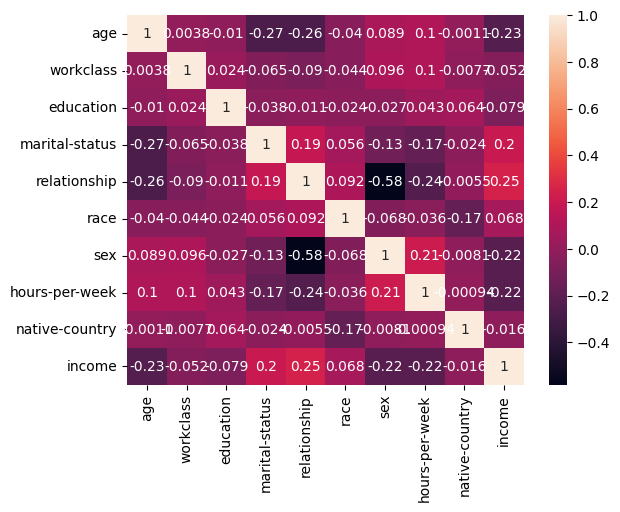

In [351]:
correlation = adult_df.corr()
sns.heatmap(correlation, annot=True)

In [352]:
def lin_regression(adult_df):
    X = np.array(adult_df['income']).reshape(-1,1)
    y = np.array(adult_df ['age']).reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
    regression = LinearRegression()
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_test)
    y_pred
    accuracy_score = regression.score(X_test, y_test)
    return accuracy_score

In [353]:
#Run the linear regression function. This outcome was higher than the logistic regression 
#so it was the better option out of the two.
lin_regression(adult_df)

0.051830880559061154

In [354]:
def log_regression(adult_df):
    X = np.array(adult_df['income']).reshape(-1,1)
    y = np.array(adult_df ['age']).reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)
    regression = LogisticRegression()
    regression.fit(X_train, y_train)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    y_pred = regression.predict(X_test)
    y_pred
    accuracy_score = regression.score(X_test, y_test)
    return accuracy_score

In [355]:
#Run the logistic regression function
log_regression(adult_df)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.03208966682020574

In [356]:
#Created a function that uses knn and normalization. The outcome was lower than the others.
def knn_score(adult_df):
    X = np.array(adult_df['income']).reshape(-1,1)
    y = np.array(adult_df['age']).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =32)
    # Standardize/Normalize - transforming values so that the mean is 0 and SD is 1
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=13)
    knn.fit(X_train, y_train)

    y_predict = knn.predict(X_test)
    print(y_predict)
    print(type(y_predict))
    return knn.score(X_test, y_test)

In [357]:
knn_score(adult_df)

c:\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[17 17 17 ... 17 17 22]
<class 'numpy.ndarray'>


0.028457365134609478